# Multi-Dimensional Scaling

Nice overview of many aspect of MDS from [Geeksforgeeks](https://www.geeksforgeeks.org/sklearn-multi-dimensional-scaling-mds-python-implementation-from-scratch/).

May also try PCA and t-SNE. See quick comparison [here](https://www.geeksforgeeks.org/multidimensional-scaling-mds-using-scikit-learn/).


In [24]:
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import pandas as pd

In [25]:
df_original = pd.DataFrame(np.random.randn(100,4))
df_original.columns = ['Dimension' + str(i+1) for i in range(len(df_original.columns))]
df_original.head()

,Dimension1,Dimension2,Dimension3,Dimension4
0,2.748161,0.211844,-0.871446,-0.183419
1,0.833168,-0.312681,0.174797,-0.737660
2,-1.328252,0.384031,0.197570,-1.036843
3,-0.008637,-0.859466,-0.741398,0.239453
4,-1.890944,1.361545,-0.504017,-0.242015


### MDS & NMDS

In [26]:
mds = MDS(n_components=2, metric=True, max_iter=3000, eps=1e-10, random_state=0) 
nmds = MDS(n_components=2, metric=False, max_iter=3000, eps=1e-10, random_state=0) 
df_mds = pd.DataFrame(mds.fit_transform(df_original))
df_mds.columns=['Dimension' + str(i+1) for i in range(mds.embedding_.shape[1])]
df_nmds = pd.DataFrame(nmds.fit_transform(df_original))
df_nmds.columns=['Dimension' + str(i+1) for i in range(nmds.embedding_.shape[1])]
print('Stress:', mds.stress_, nmds.stress_)

Stress: 2155.0049211874357 220.57670272824953


<AxesSubplot:xlabel='Dimension1', ylabel='Dimension2'>

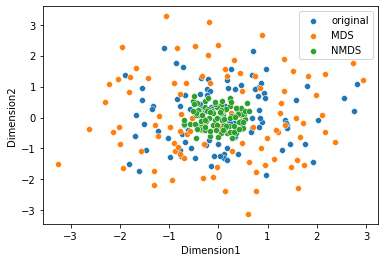

In [27]:
axs = sn.scatterplot(data=df_original, x='Dimension1', y='Dimension2', label='original')
sn.scatterplot(data=df_mds, x='Dimension1', y='Dimension2', label='MDS', ax=axs)
sn.scatterplot(data=df_nmds, x='Dimension1', y='Dimension2', label='NMDS', ax=axs)

### PCA

In [42]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_original), columns=['Dimension' + str(i+1) for i in range(pca.n_components_)])
print('Total explained ratio:', sum(pca.explained_variance_ratio_))
print('explained ratio:', pca.explained_variance_ratio_)
print('singular values:', pca.singular_values_)

Total explained ratio: 0.5697799455609212
explained ratio: [0.29975551 0.27002444]
singular values: [10.59634979 10.05713406]


<AxesSubplot:xlabel='Dimension1', ylabel='Dimension2'>

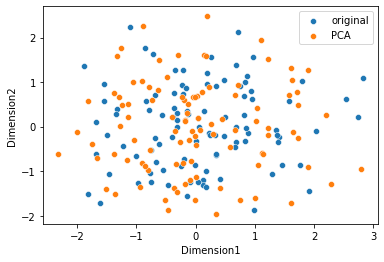

In [43]:
axs = sn.scatterplot(data=df_original, x='Dimension1', y='Dimension2', label='original')
sn.scatterplot(data=df_pca, x='Dimension1', y='Dimension2', label='PCA', ax=axs)

### Transformation

In [44]:
point = [[1, 2, 3, 4]]
point_transformed = pca.transform(point)
print(point, point_transformed)


[[1, 2, 3, 4]] [[3.25195374 1.13469258]]


c:\Users\Marsspi\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [45]:
print(point, pca.inverse_transform(point_transformed)) # the result is not the same since the number of components in PCA is different from the original

[[1, 2, 3, 4]] [[ 2.0606793  -1.21300458  1.88182616  1.53334619]]
